In [414]:
import pandas as pd
import numpy as np
from numpy import random
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import statsmodels.api as sm

In [415]:
m = 113.44

x_limit = 300
data_count = 20_000

x = x_limit * random.rand(data_count)
c = 3000

y = m*x + c

max = 460

In [416]:
y

array([30692.3142628 , 18938.95237545, 30845.19392087, ...,
        6890.35187672, 27105.05961702, 24122.2060384 ])

In [417]:
y_inacc = []
r_inacc = []

data_correct = 300
while data_correct < data_count:
    r = np.random.normal(0,8)
    temp = y[data_correct] + (max)*r
    y_inacc.append(temp)
    r_inacc.append(r)
    data_correct += 1

In [418]:
y_inacc = np.array(y_inacc)

In [419]:
len(y_inacc)

19700

In [420]:
y = y[:-len(y_inacc)]
len(y)

300

In [421]:
y = np.concatenate((y, y_inacc))
y

array([30692.3142628 , 18938.95237545, 30845.19392087, ...,
        4889.21060141, 30944.67694594, 29125.24081646])

In [422]:
len(y)

20000

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


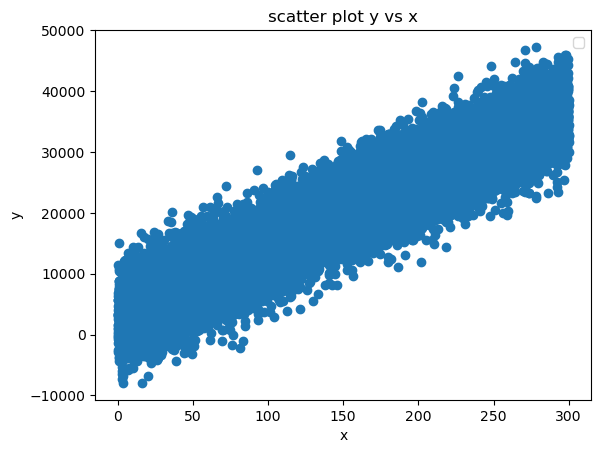

In [423]:
plt.scatter(x,y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('scatter plot y vs x')

plt.legend()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

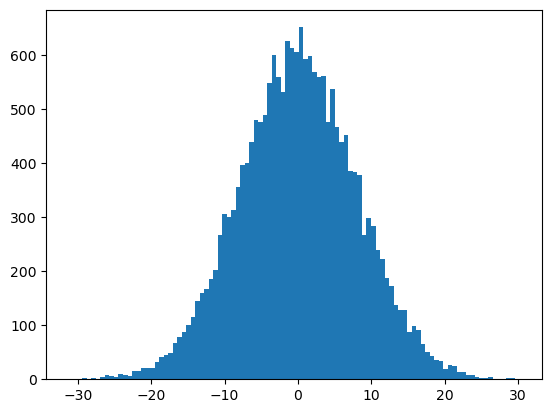

In [424]:
plt.hist(r_inacc,100)
plt.show

NOW REGRESSION TIME
===

In [425]:
x_train, x_test, y_train, y_test = train_test_split(x,y,
                                                    test_size=0.25,
                                                    random_state=0)

print('Train size : ', x_train.shape)
print('Test size  : ', x_test.shape)

Train size :  (15000,)
Test size  :  (5000,)


In [426]:
x_train

array([109.14372054, 251.07182621, 186.19168086, ..., 130.63236958,
       139.41184419,  94.17581424])

In [427]:
x_train = x_train.reshape(-1, 1)

In [428]:
x_train

array([[109.14372054],
       [251.07182621],
       [186.19168086],
       ...,
       [130.63236958],
       [139.41184419],
       [ 94.17581424]])

Method 3: Scikit-Learn

In [429]:
linear_regression = LinearRegression()
linear_regression.fit(x_train,y_train)

print("formula from regression is: ")
print("y = ", linear_regression.coef_, "x + ", linear_regression.intercept_)
print("original: ")
print("y = ", m, "x + ", c)

formula from regression is: 
y =  [113.25754816] x +  3042.7603015602654
original: 
y =  113.44 x +  3000


MULTIVARIABLE LINEAR REGRESSION

In [430]:
m = 113.44
a = 10
b = 1000

x_limit = 300
x_1_limit = 4200
x_2_limit = 80
data_count = 20_000

x = x_limit * random.rand(data_count)
x_1 = x_1_limit * random.rand(data_count)
x_2 = x_2_limit * random.rand(data_count)
c = 3000

y = (m*x) + (a*x_1) + (b*x_2) + c

max = 460

In [431]:
y_inacc = []
r_inacc = []

data_correct = int(round(data_count * 0.01, 0))
while data_correct < data_count:
    r = np.random.normal(0,8)
    temp = y[data_correct] + (max)*r
    y_inacc.append(temp)
    r_inacc.append(r)
    data_correct += 1
    
y_inacc = np.array(y_inacc)
y = y[:-len(y_inacc)]
y = np.concatenate((y, y_inacc))
y

array([ 39210.91586924,  30982.90065174, 115561.31448871, ...,
        71816.82280341,  48280.67058821,  64917.83129281])

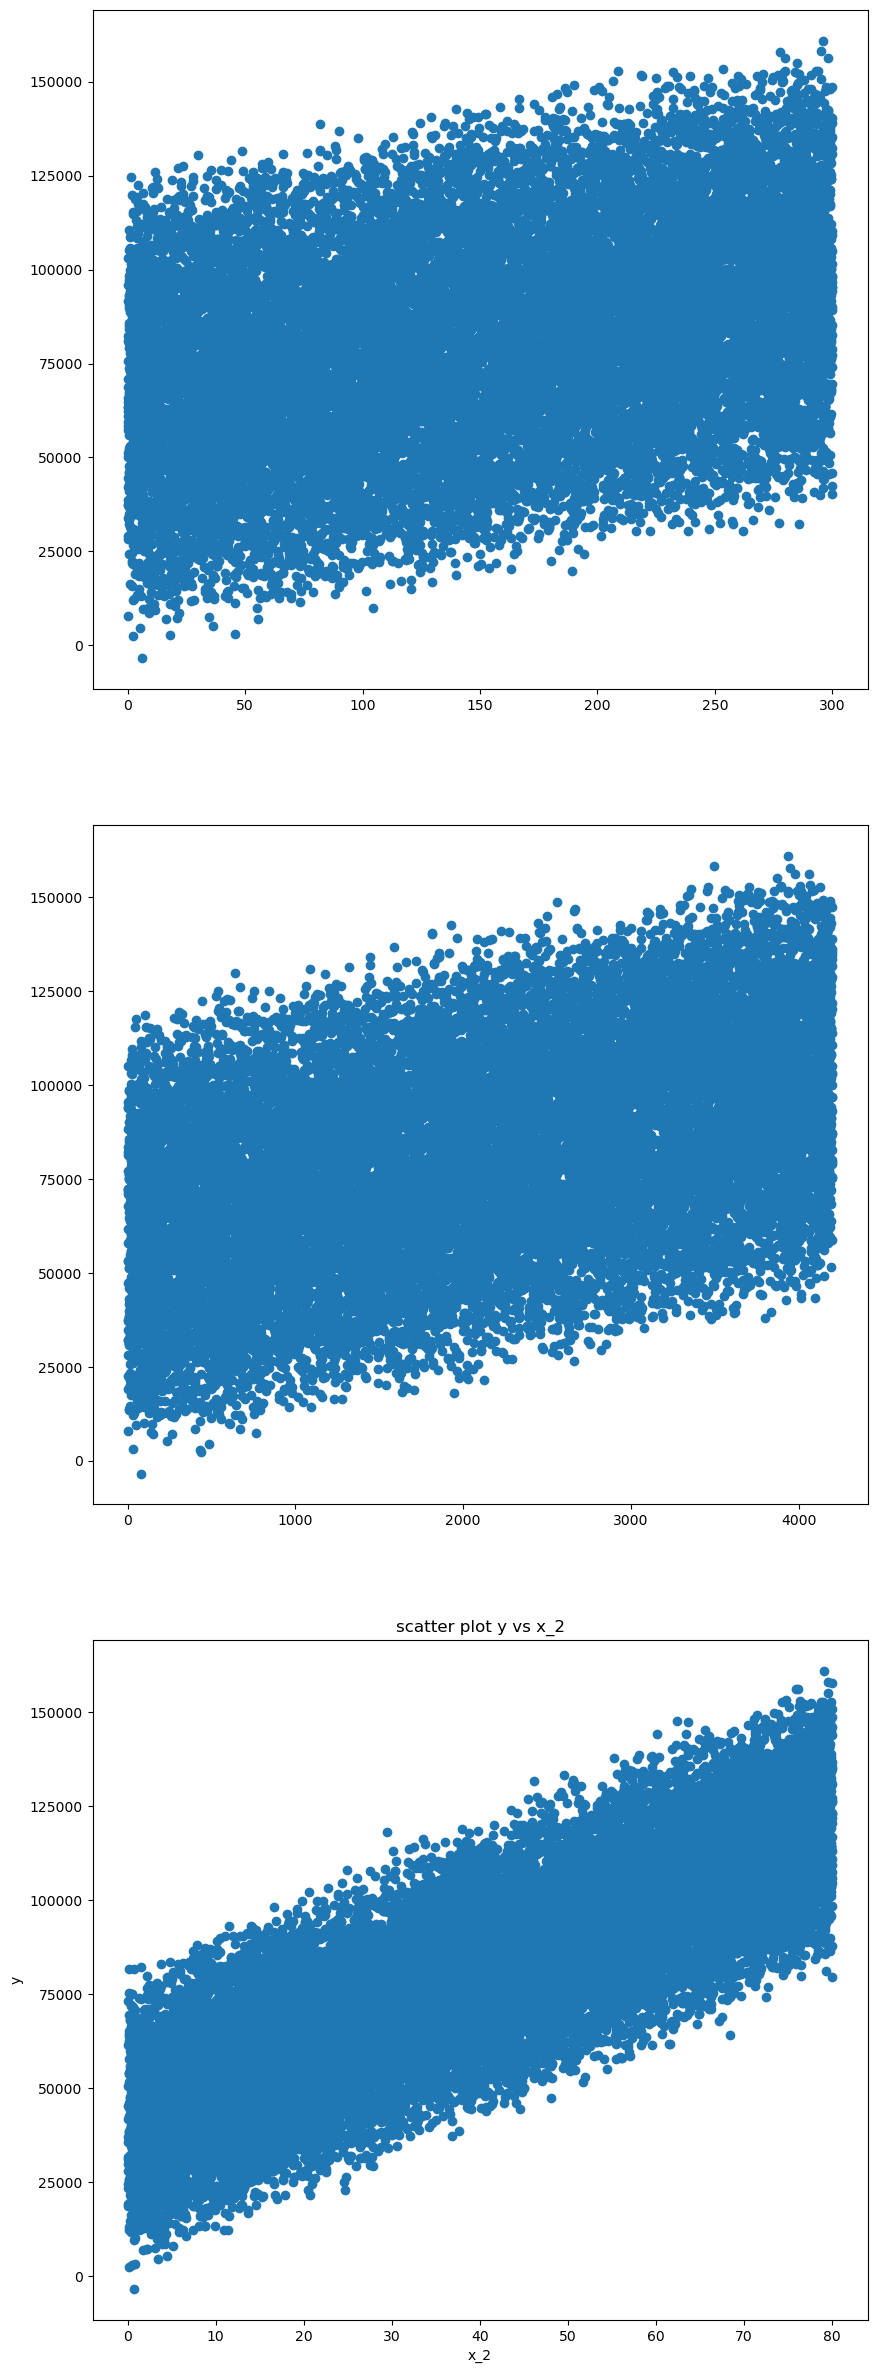

In [432]:
fig, ax = plt.subplots (3,1, figsize = (10,30))

ax[0].scatter(x,y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('scatter plot y vs x')

ax[1].scatter(x_1,y)
plt.xlabel('x_1')
plt.ylabel('y')
plt.title('scatter plot y vs x_1')

ax[2].scatter(x_2,y)
plt.xlabel('x_2')
plt.ylabel('y')
plt.title('scatter plot y vs x_2')

plt.show()

In [433]:
x_data = pd.DataFrame(
    {
        'x': x,
        'x_1': x_1,
        'x_2': x_2
    }
)
y_data = pd.DataFrame(y)

In [434]:
x_train, x_test, y_train, y_test = train_test_split(x_data,y_data,
                                                    test_size=0.25,
                                                    random_state=0)

print('Train size : ', x_train.shape)
print('Test size  : ', x_test.shape)

Train size :  (15000, 3)
Test size  :  (5000, 3)


In [435]:
scaler = StandardScaler()
scaler.fit(x_train)

x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

x_train_scaled.shape

(15000, 3)

In [436]:
model = LinearRegression()
model.fit(x_train_scaled,y_train)

coeff = model.coef_
coeff = list(np.concatenate(coeff))
intercept = model.intercept_

coeff_list = {
    'feature': x_train.columns.tolist(),
    'coefficient': coeff
}

print('Intercept : ', intercept)
coeff_list = pd.DataFrame(coeff_list)

Intercept :  [80916.03711149]


In [437]:
coeff_list

,feature,coefficient
0,x,9839.808670
1,x_1,12211.780491
2,x_2,23088.847620


In [438]:
print("m: ", m)
print("a: ", a)
print("b: ", b)

m:  113.44
a:  10
b:  1000


if i use model.fit(x_train,y_train) it works
if i use model.fit(x_train_scaled,y_train) it doesnt
coefficient become very wrong

In [439]:
y_train_predict = model.predict(x_train_scaled)
y_test_predict = model.predict(x_test_scaled)

print('MAE - Train Set  : ', mean_absolute_error(y_train, y_train_predict))
print('MAE - Test Set   : ', mean_absolute_error(y_test, y_test_predict))
print('')

print('MSE - Train Set  : ', mean_squared_error(y_train, y_train_predict))
print('MSE - Test Set   : ', mean_squared_error(y_test, y_test_predict))
print('')

print('RMSE - Train Set : ', mean_squared_error(y_train, y_train_predict, squared=False))
print('RMSE - Test Set  : ', mean_squared_error(y_test, y_test_predict, squared=False))
print('')

print('R2 Score - Train Set : ', r2_score(y_train, y_train_predict))
print('R2 Score - Test Set  : ', r2_score(y_test, y_test_predict))
print('')

MAE - Train Set  :  2914.2689213372487
MAE - Test Set   :  2883.859070656569

MSE - Train Set  :  13478470.072440574
MSE - Test Set   :  13113373.961952142

RMSE - Train Set :  3671.303593063447
RMSE - Test Set  :  3621.239285376229

R2 Score - Train Set :  0.983008785794395
R2 Score - Test Set  :  0.9837233984624917



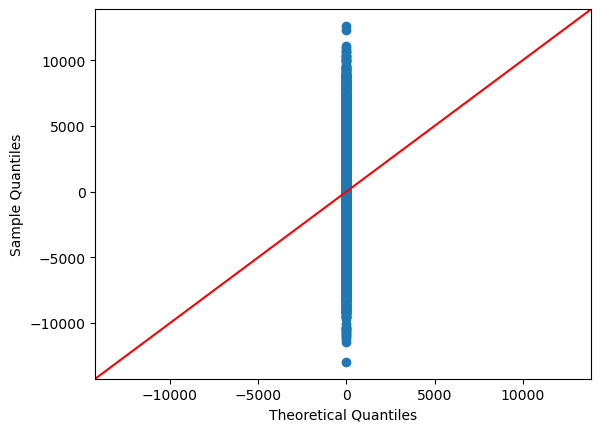

In [440]:
y_test_residuals = y_test - y_test_predict

sm.qqplot(y_test_residuals, line='45')
plt.show()

In [441]:
x_train_scaled_table = pd.DataFrame(x_train_scaled, columns=['x', 'x_1', 'x_2'])
y_train.reset_index(drop=True, inplace = True)
x_train_scaled_table

,x,x_1,x_2
0,1.675561,-0.319091,0.491516
1,0.354038,0.330628,0.940658
2,1.594666,-0.728604,1.592787
3,1.114285,0.297943,-1.069581
4,0.033121,0.873192,-0.016367
...,...,...,...
14995,0.542957,0.632358,1.414595
14996,1.459108,1.693174,-1.054210
14997,-1.634280,1.335997,0.593496
14998,0.107873,0.789480,1.382337


In [442]:
y_train

,0
0,108021.860599
1,106840.019918
2,124289.205808
3,65490.971591
4,91627.035084
...,...
14995,130450.826059
14996,87506.447264
14997,95883.539328
14998,121467.714441


In [443]:
new_table = pd.concat([x_train_scaled_table,y_train], join = 'outer', axis = 1)
new_table.to_csv('scaled_test.csv')

testing in excel shows the scaled coefficients and intercepts are correct. Its just that the x, x_1, x_2 values are centered around 0, have both negative and positive values, and smaller values ( in the ones not hundres like the original dataset )